In [1]:
#modelo NDOF

import numpy as np
import control as ct

#Sistema M,K,C: M*d2xr/dt2+C*dxr*dt+K*xr=-M*I1*d2xg/dt2+Gf*f

n=10             #nº de pisos
mf=10**5         #massa de cada piso
kf=452.43*10**6  #rigidez entre pisos N/m
cf=1.51*10**6    #amortecimento entr pisos Ns/m
a0=0.0033

M=np.zeros([n,n]); M=mf*np.diag(np.ones(n))
K=np.zeros([n,n]); K=2*kf*np.diag(np.ones(n)) + np.diag(-kf*np.ones(n-1),-1) + np.diag(-kf*np.ones(n-1),1)
C=K*a0
I1=np.ones(n)

#Sistema SS: dz/dt=A*z+B*f+G*d2xg/dt2; y=Ci*z+D*f+H*d2xg/dt2

#As=[zeros(n),eye(n);-M^-1*K,M^-1*C]
As=np.zeros([2*n,2*n])
As[0:n,n:2*n+1]=np.eye(n)
As[n:2*n+1,0:n]=np.dot(-np.linalg.inv(M),K)
As[n:2*n+1,n:2*n+1]=np.dot(-np.linalg.inv(M),C)


#Gs=-[zeros(n+1,1);ones(n+1,1)];
Gs=np.zeros([2*n,1]); Gs[n:2*n,0]=-np.ones(n)


#Cs=[eye(n+1)-diag(ones(1,n),-1) zeros(n+1,n+1);-Mn^-1*Kn -Mn^-1*Cn]; %saida: desloc rel e acel

#Cs= deslocamento relativo x-xg, Hs=[zeros(n+1,1)]
Cs=np.zeros([n,2*n]);Cs[0:n,0:n]=np.eye(n); Hs=np.zeros([n,1])

#Cs= aceleração
#Cs=np.zeros([n,2*n]);Cs[0:n,0:n]=np.dot(-np.linalg.inv(M),K);Cs[0:n,n:2*n+1]=np.dot(-np.linalg.inv(M),C)
#Hs=np.ones([n,1])

#sistema
Sis=ct.ss(As,Gs,Cs,Hs)


#As.shape
#len(I1)


#ct.zeros(Sis)
#ct.poles(Sis)

[wnsis,zetasis,polessis]=ct.damp(Sis);



    Eigenvalue (pole)       Damping     Frequency
    -29.26    +129.9j        0.2197         133.2
    -29.26    -129.9j        0.2197         133.2
    -27.49    +126.1j         0.213         129.1
    -27.49    -126.1j         0.213         129.1
    -24.71    +119.8j        0.2019         122.4
    -24.71    -119.8j        0.2019         122.4
    -21.13    +111.2j        0.1867         113.2
    -21.13    -111.2j        0.1867         113.2
    -17.05    +100.2j        0.1678         101.7
    -17.05    -100.2j        0.1678         101.7
    -12.81    +87.16j        0.1454          88.1
    -12.81    -87.16j        0.1454          88.1
    -8.728     +72.2j          0.12         72.73
    -8.728     -72.2j          0.12         72.73
    -5.153    +55.65j       0.09221         55.88
    -5.153    -55.65j       0.09221         55.88
     -2.37    +37.83j       0.06254          37.9
     -2.37    -37.83j       0.06254          37.9
   -0.6048    +19.14j       0.03159         19.15


In [2]:
wnsis/6.28


array([21.20327308, 21.20327308, 20.55359752, 20.55359752, 19.48550999,
       19.48550999, 18.02075367, 18.02075367, 16.18914678, 16.18914678,
       14.02797553, 14.02797553, 11.58123516, 11.58123516,  8.89873425,
        8.89873425,  6.03508076,  6.03508076,  3.04857043,  3.04857043])

array([[list([<matplotlib.lines.Line2D object at 0x0000018C4E062F50>]),
        list([])]], dtype=object)

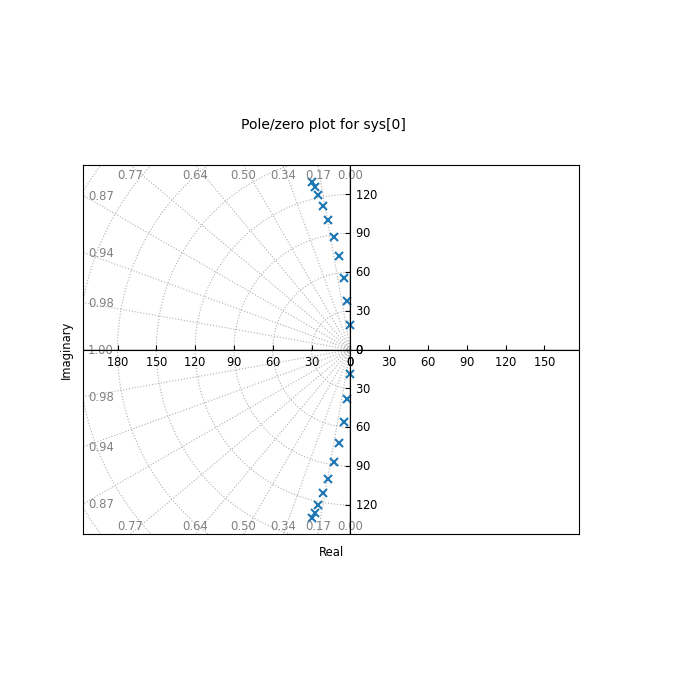

In [3]:
ct.pzmap(Sis, grid='true')

In [4]:
kf


452430000.0

In [5]:
Test=np.array([[1,2,3],[4,5,6]])

Test
#M[0,:]
#K[:,0]

#I1.shape
#len(I1)



array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
#np.zeros(n)

Test[1,0:3]

array([4, 5, 6])

In [7]:
K.shape
#len(I1)

(10, 10)

In [8]:



#I1t=np.transpose(I1)
#I1t=I1.transpose()
I1t=I1[:,None]
I1t.shape
#ct.damp(As)

(10, 1)

In [90]:
np.dot(I1t,I1)

ValueError: shapes (10,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

In [84]:
#I1t.shape
#len(I1t)
I1 * I1t

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
[Ms,Ks] = porticomk(n,ms/n,fs,0,0);  %matrizes de massa e rigidez
Cs=rayleigh(Ms,Ks,[0 zetas],2);    %matriz de amortecimento
%
As=[zeros(n) eye(n);-Ms^-1*Ks -Ms^-1*Cs];
[wns zes]= damp(As);fsn=sortrows([wns/(2*pi), zes*100]);